# Práctica 1 - Clasificación de datos de pisos vacacionales.
#### Aprendizaje automático I 
#### *UNED 2022/2023* 
#### **Alumno:** Adrián Portillo Sánchez

## Enunciado de la práctica

Tendremos que clasificar datos obtenidos de la web InsideAirBnB, que recopila información sobre los alquileres vacaciones ofertados en la plataforma AirBnB, en concreto el dataset se remite a la ciudad de Madrid, a fecha de Abril de 2017. 

El dataset contiene 13321 registros con 11 campos cada uno, correspondientes a diferentes características de cada oferta de alojamiento. 

Tendremos que realizar un análisis exploratorio de los datos, y posteriormente, realizar un modelo de clasificación que nos permita clasificar según el tipo de alojamiento, definido en
el campo room_type, a partir del resto de características.

## 1. Descripción de los datos

In [1309]:
# Cargamos los datos de los pisos vacaciones en un DataFrame de Pandas

import pandas as pd

airbnb = pd.read_csv('airbnb.csv', sep=',', decimal='.')

In [1310]:
# Veamos los primeros registros

airbnb.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Centro,Justicia,40.424715,-3.698638,Entire home/apt,49,28,35,0.42,1,99
1,Centro,Embajadores,40.413418,-3.706838,Entire home/apt,80,5,18,0.30,1,188
2,Moncloa - Aravaca,Argüelles,40.424920,-3.713446,Entire home/apt,40,2,21,0.25,9,195
3,Moncloa - Aravaca,Casa de Campo,40.431027,-3.724586,Entire home/apt,55,2,3,0.13,9,334
4,Latina,Cármenes,40.403410,-3.740842,Private room,16,2,23,0.76,2,250


In [1311]:
# Veamos los tipos de datos de cada columna

airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13321 entries, 0 to 13320
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             13321 non-null  object 
 1   neighbourhood                   13321 non-null  object 
 2   latitude                        13321 non-null  float64
 3   longitude                       13321 non-null  float64
 4   room_type                       13321 non-null  object 
 5   price                           13321 non-null  int64  
 6   minimum_nights                  13321 non-null  int64  
 7   number_of_reviews               13321 non-null  int64  
 8   reviews_per_month               13321 non-null  float64
 9   calculated_host_listings_count  13321 non-null  int64  
 10  availability_365                13321 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.1+ MB


Podemos ver que existen 11 campos en el dataset, de los cuales 8 son numéricos y 3 son categóricos.

En concreto tenemos los siguientes campos:

- **neighbourhood_group**: Distrito al que pertenece el alojamiento [*categórico*].
- **neighbourhood**: Barrio al que pertenece el alojamiento [*categórico*].
- **latitude**: Latitud de la ubicación del alojamiento [*numérico continuo*].
- **longitude**: Longitud de la ubicación del alojamiento [*numérico continuo*].
- **room_type**: Tipo de alojamiento [*categórico*]. Esta es la variable objetivo de la práctica.
- **price**: Precio del alojamiento [*numérico discreto*].
- **minimum_nights**: Número mínimo de noches que se puede reservar [*numérico discreto*].
- **number_of_reviews**: Número de comentarios que tiene el alojamiento [*numérico discreto*].
- **reviews_per_month**: Número de comentarios por mes [*numérico continuo*].
- **calculated_host_listings_count**: *numérico discreto* Número de alojamientos que tiene el anfitrión [*numérico discreto*].
- **availability_365**: *numérico discreto* Número de días que está disponible el alojamiento [*numérico discreto*].

### 1.1. Análisis de la variable objetivo

El campo que nos interesa predecir es el campo room_type, que nos indica el tipo de alojamiento que es. 

Veamos los valores que puede tomar:

In [1312]:
# Veamos los posibles valores de la variable 'room_type'

airbnb['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)


Cómo podemos ver, el campo room_type tiene 3 valores posibles: Entire home/apt, Private room y Shared room.

- **Entire home/apt:** Es un alojamiento completo, que se alquila entero.

- **Private room:** Es un alojamiento que se comparte con el anfitrión, pero que se alquila una habitación privada.

- **Shared room:** Es un alojamiento que se comparte con el anfitrión, y se alquila una habitación compartida.

Ahora vamos a ver la distribución de la variable objetivo, para ver si está balanceada o no.

In [1313]:
# Veamos si la variable 'room_type' está balanceada

# Veamos la distribución de la variable 'room_type'
airbnb['room_type'].value_counts()

Entire home/apt    7926
Private room       5203
Shared room         192
Name: room_type, dtype: int64

In [1314]:
# Veamos la distribución de la variable 'room_type' en porcentaje

airbnb['room_type'].value_counts(normalize=True)

Entire home/apt    0.595000
Private room       0.390586
Shared room        0.014413
Name: room_type, dtype: float64

<AxesSubplot:>

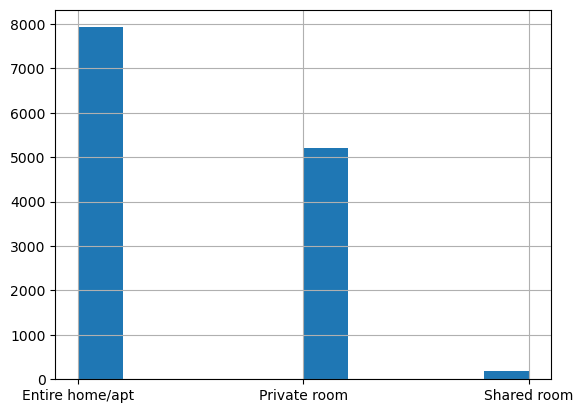

In [1315]:
# Veamos la distribución de la variable 'room_type' gráficamente

airbnb["room_type"].hist()

Cómo podemos ver, la variable objetivo no está balanceada, ya que hay más alojamientos de tipo Entire home/apt que de los otros dos tipos, y especialmente muy pocos del tipo Shared room.

Habrá que tenerlo en cuenta a la hora de dividir el dataset en train y test, para que no haya un desbalanceo en los conjuntos.

In [1316]:
# Convertimos los campos categóricos a numéricos, para poder visualizarlos gráficamente

airbnb_num = airbnb.copy()
airbnb_num['room_type'] = airbnb_num['room_type'].astype('category')
airbnb_num['room_type'] = airbnb_num['room_type'].cat.codes
airbnb_num['neighbourhood'] = airbnb_num['neighbourhood'].astype('category')
airbnb_num['neighbourhood'] = airbnb_num['neighbourhood'].cat.codes
airbnb_num['neighbourhood_group'] = airbnb_num['neighbourhood_group'].astype('category')
airbnb_num['neighbourhood_group'] = airbnb_num['neighbourhood_group'].cat.codes

In [1317]:
# Veamos a los valores numéricos de la variables categórica objetivo 'room_type'

room_type = [airbnb['room_type'].astype('category').cat.categories.tolist(), airbnb['room_type'].astype('category').cat.codes.unique().tolist()]
room_type

[['Entire home/apt', 'Private room', 'Shared room'], [0, 1, 2]]

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

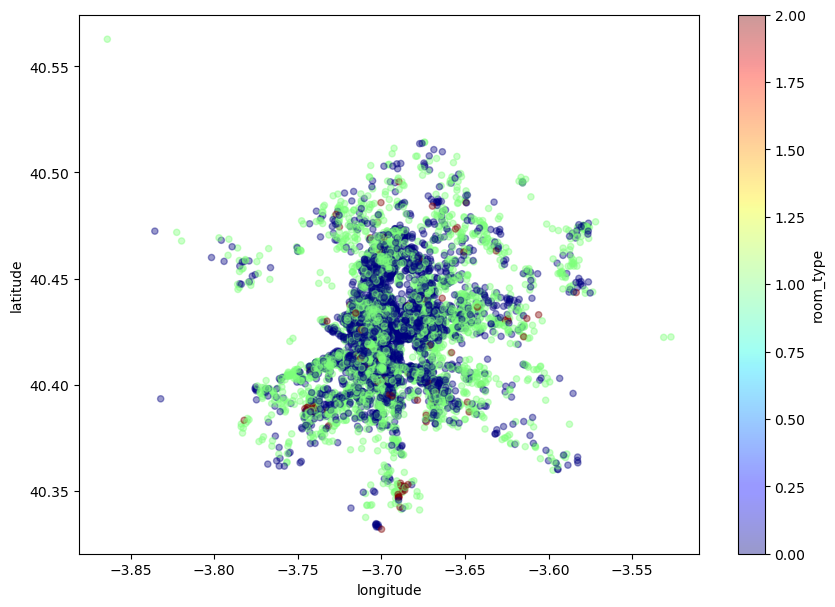

In [1318]:
# Veamos ahora la distribución geográfica de la variable 'room_type'

import matplotlib.pyplot as plt

airbnb_num.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7), c="room_type", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

- 0 se corresponde a Entire home/apt, los puntos azules.
- 1 se corresponde a Private room, los puntos verdes.
- 2 se corresponde a Shared room, los puntos rojos.

### 1.2. Análisis de las variables

Ahora vamos a ver la distribución de los datos de los campos, para ver si hay valores atípicos, o si hay que normalizar los datos.

array([[<AxesSubplot:title={'center':'neighbourhood_group'}>,
        <AxesSubplot:title={'center':'neighbourhood'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'room_type'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>],
       [<AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:>]], dtype=object)

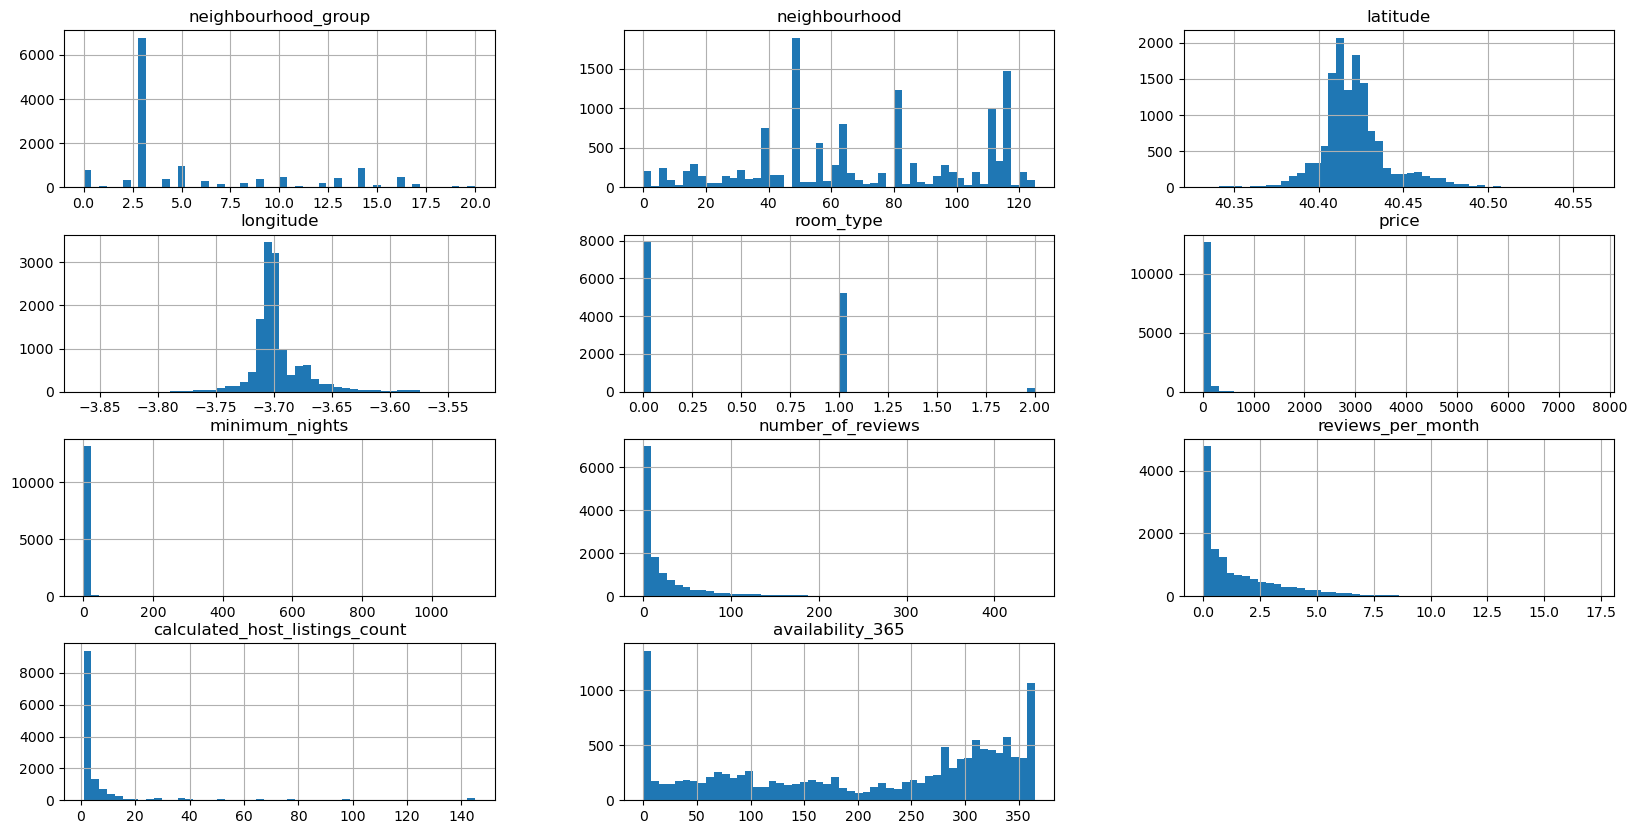

In [1319]:
airbnb_num.hist(bins=50, figsize=(20,10))        

<AxesSubplot:>

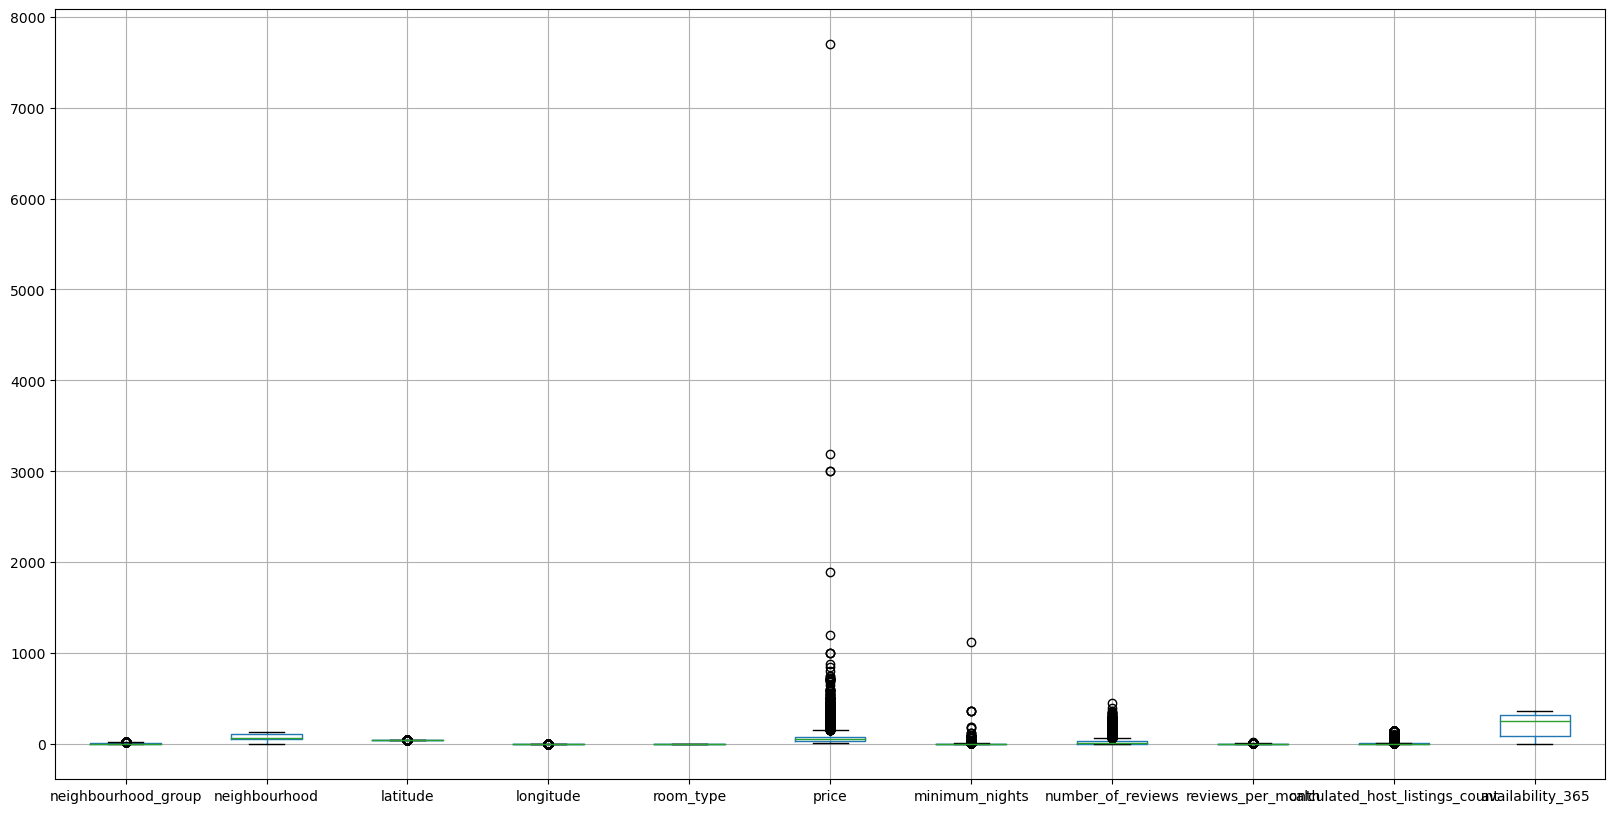

In [1320]:
# Veamos los diagramas de caja de cada variable para ver si hay valores atípicos

airbnb_num.boxplot(figsize=(20,10))

Como podemos ver, los campos numéricos de precio y número de noches tienen una distribución muy sesgada, con muchos valores atípicos.

También podemos ver que con los campos numéricos de número de comentarios y número de alojamientos del anfitrión también tienen valores atípicos.

In [1321]:
# Creamos una copia del DataFrame para trabajar con ella

airbnb_pruebas = airbnb_num.copy()

In [1322]:
# Eliminamos los outliers

airbnb_pruebas = airbnb_pruebas[airbnb_pruebas['price'] < 500]
airbnb_pruebas = airbnb_pruebas[airbnb_pruebas['minimum_nights'] < 30]
airbnb_pruebas = airbnb_pruebas[airbnb_pruebas['number_of_reviews'] < 100]
airbnb_pruebas = airbnb_pruebas[airbnb_pruebas['reviews_per_month'] < 5]
airbnb_pruebas = airbnb_pruebas[airbnb_pruebas['calculated_host_listings_count'] < 10]

array([[<AxesSubplot:title={'center':'neighbourhood_group'}>,
        <AxesSubplot:title={'center':'neighbourhood'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'room_type'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>],
       [<AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:>]], dtype=object)

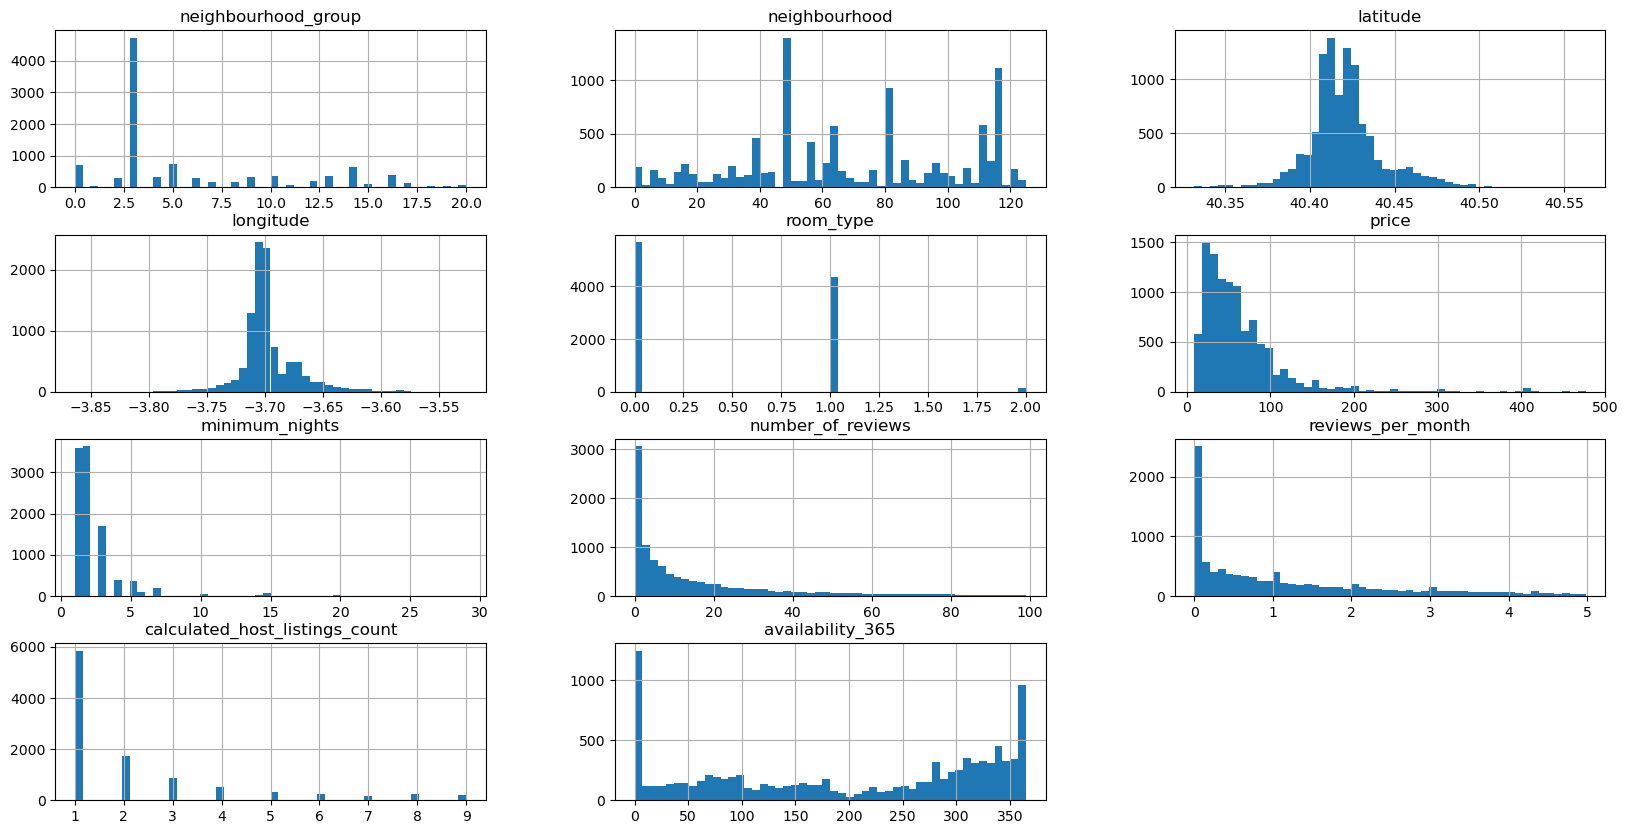

In [1323]:
# Veamos la distribución de los datos tras eliminar los outliers

airbnb_pruebas.hist(bins=50, figsize=(20,10))

#### 1.3.3. Análisis geográfico de los datos

Visualicemos la distribución geográfica de los alojamientos, para ver si hay algún patrón que nos pueda ayudar a predecir la variable objetivo, así como de los precios. 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

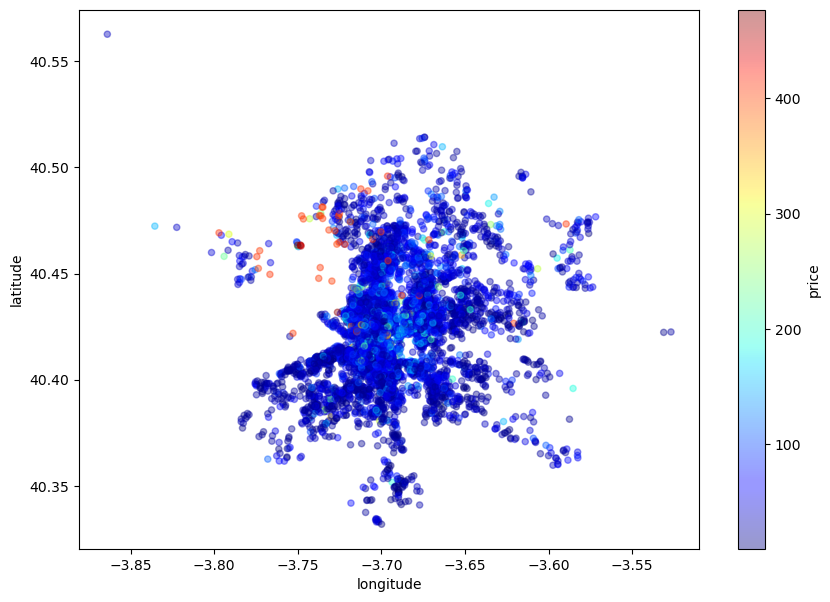

In [1324]:
# Veamos la distribución geográfica de los datos

airbnb_pruebas.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7), c="price", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

Veamos si hay datos nulos, para ver si hay que tratarlos de alguna manera.

In [1325]:
airbnb_pruebas.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

No hay datos nulos en el dataset, por lo que no habrá que tratarlos.

Veamos ahora la correlación entre los campos numéricos, para ver si hay campos que estén muy correlacionados, y por tanto, si hay que eliminar alguno de ellos.

In [1326]:
# Veamos las correlaciones entre las variables

airbnb_pruebas.corr()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,1.000000,-0.156424,0.116471,0.332044,0.118634,-0.046584,-0.005635,-0.134269,-0.119645,-0.060735,0.024237
neighbourhood,-0.156424,1.000000,0.055569,0.000057,-0.055437,0.041167,-0.007020,0.037565,0.021155,0.058826,0.002491
latitude,0.116471,0.055569,1.000000,0.203623,-0.002408,0.120872,-0.006308,-0.071489,-0.090525,-0.060654,0.032021
longitude,0.332044,0.000057,0.203623,1.000000,0.060861,-0.066261,0.003192,-0.051743,-0.037721,-0.065920,0.007556
room_type,0.118634,-0.055437,-0.002408,0.060861,1.000000,-0.423786,-0.148952,-0.168986,-0.182368,-0.068233,0.041703
price,-0.046584,0.041167,0.120872,-0.066261,-0.423786,1.000000,0.035278,0.004694,-0.033453,0.062091,0.080354
minimum_nights,-0.005635,-0.007020,-0.006308,0.003192,-0.148952,0.035278,1.000000,-0.030651,-0.107467,-0.014725,-0.041253
number_of_reviews,-0.134269,0.037565,-0.071489,-0.051743,-0.168986,0.004694,-0.030651,1.000000,0.637839,0.104514,0.120925
reviews_per_month,-0.119645,0.021155,-0.090525,-0.037721,-0.182368,-0.033453,-0.107467,0.637839,1.000000,0.071544,0.030078
calculated_host_listings_count,-0.060735,0.058826,-0.060654,-0.065920,-0.068233,0.062091,-0.014725,0.104514,0.071544,1.000000,0.135888


array([[<AxesSubplot:xlabel='neighbourhood_group', ylabel='neighbourhood_group'>,
        <AxesSubplot:xlabel='neighbourhood', ylabel='neighbourhood_group'>,
        <AxesSubplot:xlabel='latitude', ylabel='neighbourhood_group'>,
        <AxesSubplot:xlabel='longitude', ylabel='neighbourhood_group'>,
        <AxesSubplot:xlabel='room_type', ylabel='neighbourhood_group'>,
        <AxesSubplot:xlabel='price', ylabel='neighbourhood_group'>,
        <AxesSubplot:xlabel='minimum_nights', ylabel='neighbourhood_group'>,
        <AxesSubplot:xlabel='number_of_reviews', ylabel='neighbourhood_group'>,
        <AxesSubplot:xlabel='reviews_per_month', ylabel='neighbourhood_group'>,
        <AxesSubplot:xlabel='calculated_host_listings_count', ylabel='neighbourhood_group'>,
        <AxesSubplot:xlabel='availability_365', ylabel='neighbourhood_group'>],
       [<AxesSubplot:xlabel='neighbourhood_group', ylabel='neighbourhood'>,
        <AxesSubplot:xlabel='neighbourhood', ylabel='neighbourhood'>,
   

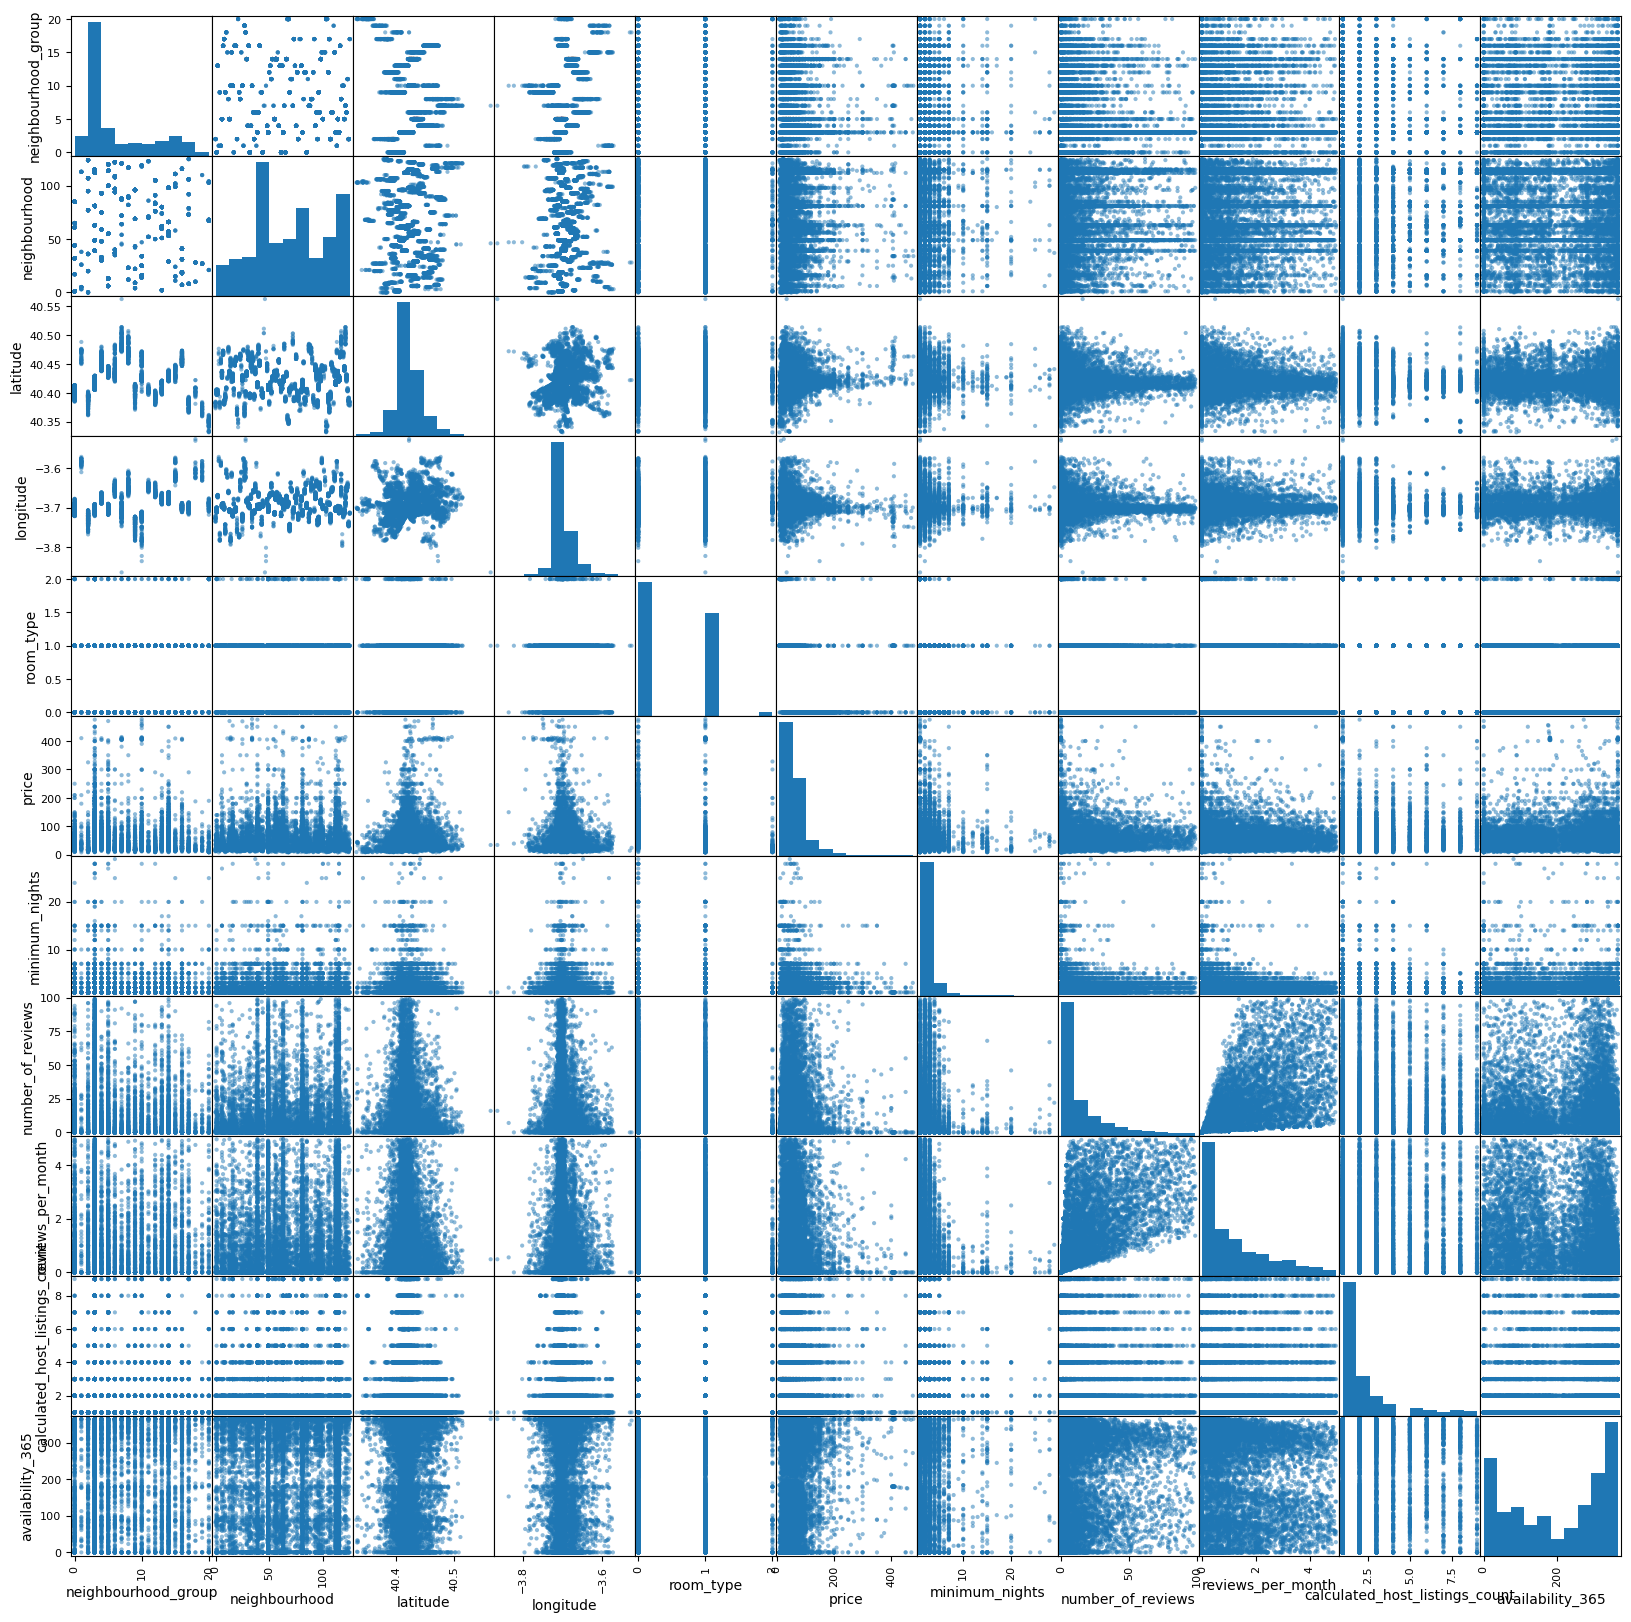

In [1327]:
from pandas.plotting import scatter_matrix

scatter_matrix(airbnb_pruebas, figsize=(20, 20))

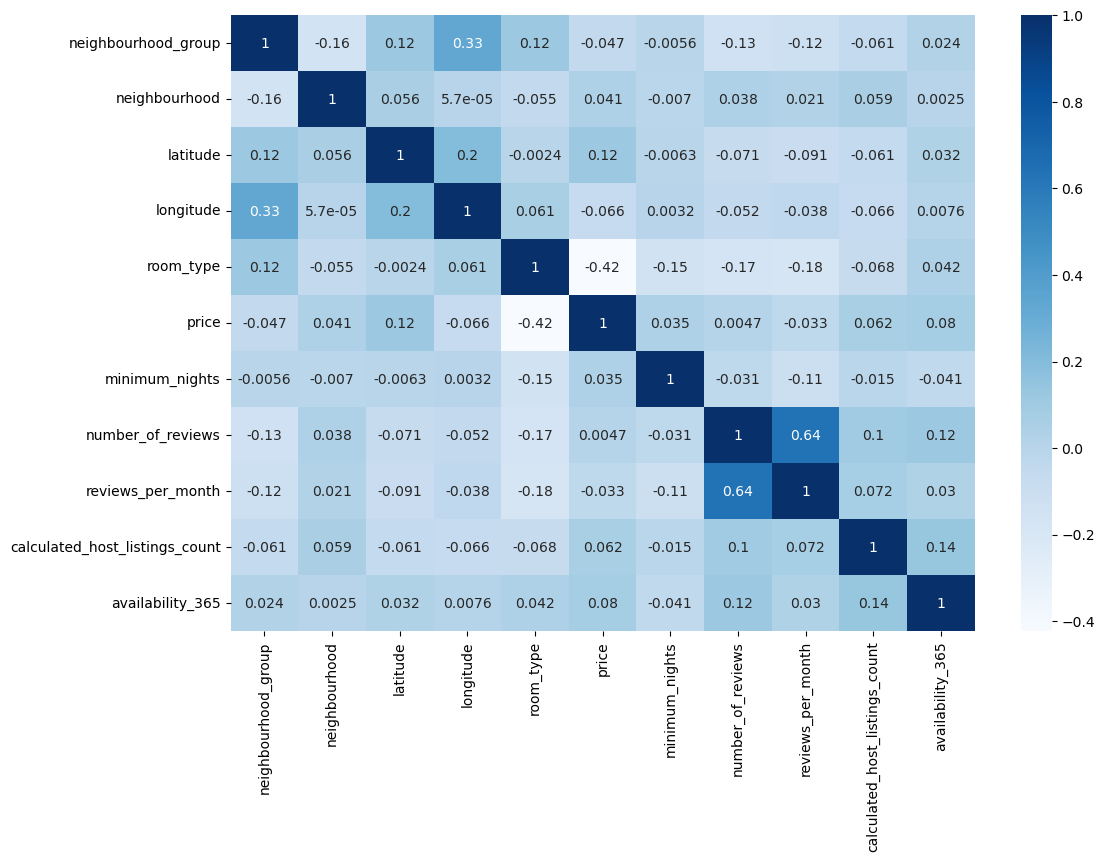

In [1328]:
import seaborn as sns

corr_matrix = airbnb_pruebas.corr()
norm_conf_mx = corr_matrix / row_sums
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Blues)
plt.show()

In [1329]:
# Veamos la correlación de la variable 'room_type' con el resto de variables

airbnb_pruebas.corr()['room_type'].sort_values(ascending=False)

room_type                         1.000000
neighbourhood_group               0.118634
longitude                         0.060861
availability_365                  0.041703
latitude                         -0.002408
neighbourhood                    -0.055437
calculated_host_listings_count   -0.068233
minimum_nights                   -0.148952
number_of_reviews                -0.168986
reviews_per_month                -0.182368
price                            -0.423786
Name: room_type, dtype: float64

Parece que la variable objetivo tiene la mayor correlación tiene con el campo de distrito, y ni siquiera es muy alta.

En cuanto al resto de campos, parece que el campo de número de comentarios por mes tiene una correlación alta con el número de comentarios, lógicamente, ya que es una variable que se calcula a partir de esta, y los campos geográficos también tienen una correlación alta entre ellos, ya que son variables que se calculan a partir de la latitud y longitud.

En cuanto a correlaciones más interesantes, parece que el campo de número de alojamientos del anfitrión tiene una correlación alta con la disponibilidad anual así cómo con el número de comentarios; lo que tiene sentido, ya que si un anfitrión tiene muchos alojamientos, es más probable que tenga muchos comentarios, y que esté disponible durante más días, de la misma forma que si está disponible durante más días, es más probable que tenga muchos comentarios.

Por otro lado, encontramos una correlación interesante entre el precio y la longitud, ya que parece que los alojamientos más caros se distribuyen sobre todo por la zona noroeste, y los más baratos en el resto del territorio, como se puede apreciar en el gráfico de dispersión.

Veamos como se seleccionan los campos más importantes para predecir la variable objetivo.

Para realizar la selección de variables, vamos a utilizar la función **SelectKBest** de la librería **scikit-learn**, que nos devuelve las variables más importantes de un conjunto de datos.

Para ello, vamos a utilizar la función **f_classif** de la librería **scikit-learn**, que nos devuelve el valor F y el p-valor de cada variable.

In [1330]:
# Seleccionamos las variables importantes con SelectKBest y f_classif

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=10)
selector.fit(airbnb_pruebas.drop('room_type', axis=1), airbnb_pruebas['room_type'])

SelectKBest()

In [1331]:
# Veamos las variables seleccionadas

selected_features = [airbnb_pruebas.drop('room_type', axis=1).columns[selector.get_support()], selector.scores_[selector.get_support()]]
selected_features = pd.DataFrame(selected_features).T
selected_features.columns = ['Feature', 'Score']
selected_features.sort_values(by='Score', ascending=False)


,Feature,Score
4,price,1174.46367
7,reviews_per_month,176.516776
6,number_of_reviews,151.417383
5,minimum_nights,115.561769
0,neighbourhood_group,72.895558
8,calculated_host_listings_count,53.928422
1,neighbourhood,18.963903
3,longitude,18.933236
9,availability_365,9.856476
2,latitude,5.853341


## 2. Preprocesamiento de los datos

### 2.1. Tratamiento de valores atípicos

Como hemos visto en el análisis de las variables, hay muchos valores atípicos en los campos numéricos, por lo que vamos a tratarlos.

Ya que este es un problema de clasificación, vamos a sustituir los valores atípicos por el límite superior de cada campo, para que no afecten a la clasificación. 

Para ello, vamos a utilizar el método del Rango Intercuarílico (IQR), que consiste en calcular los valores que están por debajo del primer cuartil menos 1.5 veces el rango intercuartílico, y por encima del tercer cuartil más 1.5 veces el rango intercuartílico.

In [1332]:
from sklearn.base import BaseEstimator, TransformerMixin

# Clase para tratar los valores atípicos
# parámetros:
#  - factor: factor de multiplicación para el cálculo del rango intercuartílico
class RemoveOutliers(BaseEstimator, TransformerMixin):
    def __init__(self, columns, factor=1.5):
        self.columns = columns
        self.factor = factor

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.copy()
        for col in self.columns:
            # Obtenemos el primer y tercer cuartil
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            # Calculamos el rango intercuartílico
            IQR = Q3 - Q1
            # Calculamos los límites inferior y superior
            high = Q3 + self.factor * IQR
            low = Q1 - self.factor * IQR
            # Iguamos los valores que estén fuera de los límites a los límites
            X.loc[X[col] < low, col] = low
            X.loc[X[col] > high, col] = high
        return X

### 2.2. Normalización de los datos

Como hemos visto en el análisis de las variables, los campos numéricos tienen una distribución muy sesgada, por lo que vamos a normalizarlos.

Para ello, vamos a utilizar la función **StandardScaler** de la librería **scikit-learn**, que nos devuelve los valores normalizados de un conjunto de datos.

In [1333]:
from sklearn.preprocessing import StandardScaler

# Clase para normalizar los datos
# parámetros:
#  - columns: lista de columnas a normalizar
#  - scaler: objeto StandardScaler
class Normalize(BaseEstimator, TransformerMixin):
    def __init__(self, columns, scaler=StandardScaler()):
        self.columns = columns
        self.scaler = scaler

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.copy()
        for col in self.columns:
            X[col] = self.scaler.fit_transform(X[[col]])
        return X

### 2.3. Codificación de las variables categóricas

Como hemos visto en el análisis de las variables, los campos categóricos tienen valores que no son numéricos, por lo que vamos a codificarlos.

Para ello, vamos a utilizar la función **OrdinalEncoder** de la librería **scikit-learn**, que nos devuelve los valores codificados de un conjunto de datos.

In [1334]:
from sklearn.preprocessing import OrdinalEncoder

# Clase para codificar las variables categóricas
# parámetros: 
#  - encoder: tipo de codificación, columns: columnas a codificar
class Encode(BaseEstimator, TransformerMixin):
    def __init__(self, encoder=OrdinalEncoder()):
        self.encoder = encoder

    def fit(self, X, y=None):
        self.encoder.fit(X)
        return self
        
    def transform(self, X, y=None):
        return self.encoder.transform(X)

### 2.3. Creación del pipeline

Ahora vamos a crear el pipeline de preprocesamiento de los datos, para que sea más fácil de usar.

In [1335]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('remove_outliers', RemoveOutliers(columns=['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count'], factor=1.5)),
    ('normalize', Normalize(columns=['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count'], scaler=StandardScaler())),
    ('encode', Encode(encoder=OrdinalEncoder())),
])

In [1336]:
# Aplicamos el pipeline de transformaciones
airbnb_transformed = pipeline.fit_transform(airbnb)

# la variable 'airbnb_transformed' es un array de numpy, así que lo convertimos a DataFrame
airbnb_prepared = pd.DataFrame(airbnb_transformed, columns=airbnb.columns)

## 2.5. División del dataset en train y test

Como hemos visto en el análisis de la variable objetivo, la variable objetivo no está balanceada, por lo que vamos a dividir el dataset en train y test de forma estratificada, para que haya la misma proporción de cada tipo de alojamiento en ambos conjuntos.

Tendremos que mantener una proporción de 80% de los datos para el conjunto de train, y el 20% restante para el conjunto de test.

Para ello, vamos a utilizar la función **train_test_split** de la librería **scikit-learn**, que nos devuelve los conjuntos de train y test, y que además nos permite dividirlos de forma estratificada con el parámetro **stratify**.

In [1337]:
# Utilizamos sampleo estratificado para mantener la proporción de las clases con respecto a la variable 'room_type'

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(airbnb_prepared, test_size=0.2, random_state=42, stratify=airbnb_prepared['room_type'])

In [1338]:
train_set.shape

(10656, 11)

In [1339]:
test_set.shape

(2665, 11)

In [1340]:
# Veamos la distribución de la variable 'room_type' en el conjunto de entrenamiento

train_set['room_type'].value_counts() / len(train_set)

0.0    0.594970
1.0    0.390578
2.0    0.014452
Name: room_type, dtype: float64

In [1341]:
# Veamos la distribución de la variable 'room_type' en el conjunto de test

test_set['room_type'].value_counts() / len(test_set)

0.0    0.595122
1.0    0.390619
2.0    0.014259
Name: room_type, dtype: float64

La proporción se mantiene en ambos conjuntos gracias a haber utilizado el parámetro **stratify** sobre la variable objetivo.

In [1342]:
# Separamos las variables predictoras de la variable objetivo

X_train = train_set.drop('room_type', axis=1)
y_train = train_set['room_type'].copy()

X_test = test_set.drop('room_type', axis=1)
y_test = test_set['room_type'].copy()

In [1343]:
# Veamos la distribución de la variable objetivo en el conjunto de entrenamiento

y_train.value_counts() / len(y_train)

0.0    0.594970
1.0    0.390578
2.0    0.014452
Name: room_type, dtype: float64

## 3. Selección y entrenamiento de los modelos

### 3.1. Selección del modelo de Naive Bayes

Como estamos ante un problema de clasificación, vamos a utilizar el algoritmo de Naive Bayes, que es un algoritmo de clasificación supervisada que se basa en el teorema de Bayes.

Vamos a comparar las posibles distribuciones de las variables, para ver cuál es la que mejor se adapta a nuestro problema.

### 3.1.1. Distribución Gaussiana

Vamos a utilizar la distribución Gaussiana, que es la distribución normal, para ver si es la que mejor se adapta a nuestro problema.

Para ello, vamos a utilizar la función **GaussianNB** de la librería **scikit-learn**, que nos devuelve el modelo de Naive Bayes con la distribución Gaussiana.

In [1344]:
# Entrenamos Naive Bayes con distribución Gaussiana

from sklearn.naive_bayes import GaussianNB

nb_gauss = GaussianNB()
nb_gauss.fit(X_train, y_train)

GaussianNB()

Para evaluar el modelo, vamos a utilizar la función **cross_val_score** de la librería **scikit-learn**, que nos devuelve el score de cada iteración de la validación cruzada, y que además nos permite utilizar la métrica **accuracy** para evaluar el modelo.

In [1345]:
# Veamos la precisión del modelo usando validación cruzada con el conjunto de prueba

from sklearn.model_selection import cross_val_score

cross_val_score = cross_val_score(nb_gauss, X_test, y_test, cv=10, scoring='accuracy')
cross_val_score

array([0.78651685, 0.7752809 , 0.82771536, 0.81273408, 0.76779026,
       0.83082707, 0.76691729, 0.7518797 , 0.77819549, 0.80075188])

In [1346]:
# Veamos la precisión media y la desviación típica
print('Precisión media: {:f}'.format(cross_val_score.mean()), '± {:f}'.format(cross_val_score.std()))

Precisión media: 0.789861 ± 0.025630


In [1347]:
# Veamos la matriz de confusión

from sklearn.metrics import confusion_matrix

y_pred = nb_gauss.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1290,  295,    1],
       [ 211,  830,    0],
       [   8,   25,    5]], dtype=int64)

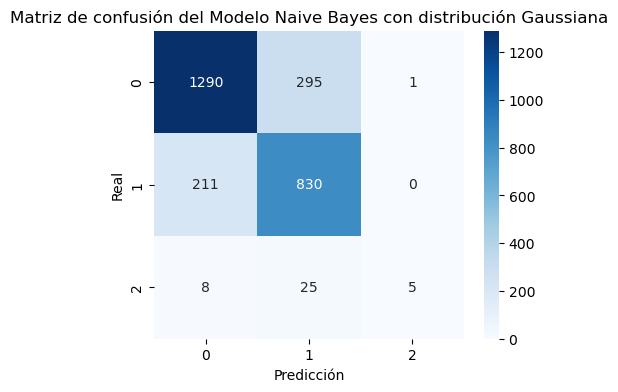

In [1348]:
# Veamos la matriz de confusión en forma de gráfico

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión del Modelo Naive Bayes con distribución Gaussiana')
plt.show()

In [1349]:
# Veamos la precisión del modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')

(0.797373358348968, 0.8025599066232888, 0.797373358348968, 0.7952864598507451)

Parece que podemos conseguir un score de 0.8 con la distribución Gaussiana, no está nada mal.

### 3.1.2. Distribución Bernoulli

Veamos a continuación con la distribución Bernoulli, que es la distribución binomial.

Para ello, vamos a utilizar la función **BernoulliNB** de la librería **scikit-learn**, que nos devuelve el modelo de Naive Bayes con la distribución Bernoulli.

In [1350]:
# Vamos a entrenar ahora Naive Bayes con distribución de Bernoulli

from sklearn.naive_bayes import BernoulliNB

nb_bern = BernoulliNB()
nb_bern.fit(X_train, y_train)

BernoulliNB()

In [1351]:
# Veamos la precisión del modelo usando validación cruzada con el conjunto de prueba

from sklearn.model_selection import cross_val_score

cross_val_score = cross_val_score(nb_bern, X_test, y_test, cv=10, scoring='accuracy')
cross_val_score

array([0.62921348, 0.68913858, 0.65917603, 0.66666667, 0.65917603,
       0.65037594, 0.62406015, 0.62030075, 0.60902256, 0.70300752])

In [1352]:
# Veamos la precisión media y la desviación típica

print('Precisión media: {:f}'.format(cross_val_score.mean()), '± {:f}'.format(cross_val_score.std()))

Precisión media: 0.651014 ± 0.029058


In [1353]:
# Veamos la matriz de confusión

y_pred = nb_bern.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1182,  404,    0],
       [ 522,  519,    0],
       [  18,   20,    0]], dtype=int64)

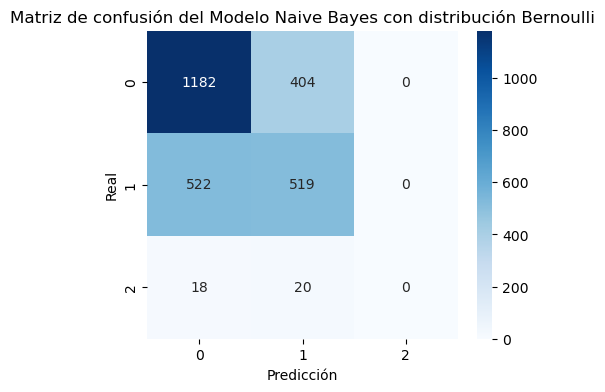

In [1354]:
# Veamos la matriz de confusión en forma de gráfico

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión del Modelo Naive Bayes con distribución Bernoulli')
plt.show()

In [1355]:
# Veamos la precisión del modelo

accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted', zero_division=1), recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')

(0.6382739212007504, 0.637742760563028, 0.6382739212007504, 0.6296589745992559)

Parece ser que con la distribución Bernoulli podemos conseguir un score de 0.6, que es peor que con la distribución Gaussiana.

### 3.1.3. Distribución Multinomial

Veamos ahora con una distribución multinomial, que es la distribución de probabilidad discreta.

Para ello, vamos a utilizar la función **MultinomialNB** de la librería **scikit-learn**, que nos devuelve el modelo de Naive Bayes con la distribución Multinomial.

In [1356]:
# Entrenamos ahora Naive Bayes con distribución multinomial

from sklearn.naive_bayes import MultinomialNB

nb_mult = MultinomialNB()
nb_mult.fit(X_train, y_train)

MultinomialNB()

In [1357]:
# Veamos la precisión del modelo usando validación cruzada con el conjunto de prueba

from sklearn.model_selection import cross_val_score

cross_val_score = cross_val_score(nb_mult, X_test, y_test, cv=10, scoring='accuracy')
cross_val_score

array([0.47191011, 0.46441948, 0.41198502, 0.5505618 , 0.47565543,
       0.51503759, 0.39849624, 0.35714286, 0.44736842, 0.36466165])

In [1358]:
# Veamos la precisión media y la desviación típica

print('Precisión media: {:f}'.format(cross_val_score.mean()), '± {:f}'.format(cross_val_score.std()))

Precisión media: 0.445724 ± 0.059595


In [1359]:
# Veamos la matriz de confusión

y_pred = nb_mult.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[996, 227, 363],
       [436, 197, 408],
       [ 20,   6,  12]], dtype=int64)

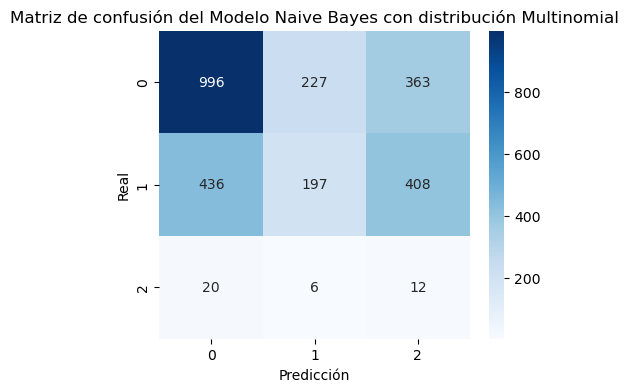

In [1360]:
# Veamos la matriz de confusión en forma de gráfico

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión del Modelo Naive Bayes con distribución Multinomial')
plt.show()

In [1361]:
# Veamos la precisión del modelo

accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')

(0.4521575984990619,
 0.5874007454652088,
 0.4521575984990619,
 0.49526042134363335)

Con la distribución multinomial podemos conseguir un score de 0.45, que es mucho peor que con las anteriormente probadas.

### 3.1.4. Distribución Complement

Por último, vamos a utilizar la distribución complement, que es la distribución complementaria de la distribución multinomial.

Para ello, vamos a utilizar la función **ComplementNB** de la librería **scikit-learn**, que nos devuelve el modelo de Naive Bayes con la distribución Complement.

In [1362]:
# Entrenamos ahora Naive Bayes con distribución Complement

from sklearn.naive_bayes import ComplementNB

nb_comp = ComplementNB()
nb_comp.fit(X_train, y_train)

ComplementNB()

In [1363]:
# Veamos la precisión del modelo usando validación cruzada con el conjunto de prueba

from sklearn.model_selection import cross_val_score

cross_val_score = cross_val_score(nb_comp, X_test, y_test, cv=10, scoring='accuracy')
cross_val_score

array([0.5917603 , 0.54681648, 0.5505618 , 0.60299625, 0.58426966,
       0.55263158, 0.56390977, 0.52631579, 0.59774436, 0.59022556])

In [1364]:
# Veamos la precisión media y la desviación típica

print('Precisión media: {:f}'.format(cross_val_score.mean()), '± {:f}'.format(cross_val_score.std()))

Precisión media: 0.570723 ± 0.024702


In [1365]:
# Veamos la matriz de confusión

y_pred = nb_comp.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1021,  565,    0],
       [ 470,  571,    0],
       [  23,   15,    0]], dtype=int64)

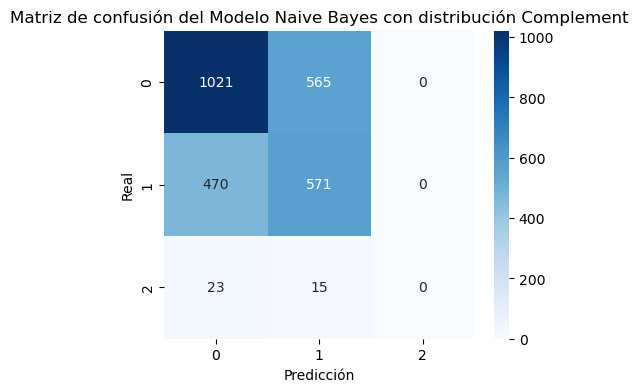

In [1366]:
# Veamos la matriz de confusión en forma de gráfico

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión del Modelo Naive Bayes con distribución Complement')
plt.show()

In [1367]:
# Veamos la precisión del modelo

accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted', zero_division=1), recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')

(0.5973733583489681, 0.6093751904244451, 0.5973733583489681, 0.595519456400302)

Con la distribución complement podemos conseguir un score de 0.6, similar al de la distribución Bernoulli.

En resumen, parece ser que la distribución Gaussiana es la que mejor se adapta a nuestro problema, por lo que es la que vamos a utilizar para el modelo de Naive Bayes.

### 3.2. Selección del modelo de K-Nearest Neighbors (KNN)

A continuación, vamos a evaluar el modelo de KNN, que es un algoritmo de clasificación supervisada que se basa en la distancia entre los puntos.

Vamos a evaluar el modelo con diferentes valores de K, para ver cuál es el que mejor se adapta a nuestro problema.

Para ello, vamos a utilizar la función **KNeighborsClassifier** de la librería **scikit-learn**, que nos devuelve el modelo de KNN con el valor de K que le pasemos.

In [1368]:
# Entrenamos KNN con 5 vecinos

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [1369]:
# Para eliminar los warnings causados por el modo.
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [1370]:
# Veamos la precisión del modelo usando validación cruzada con el conjunto de prueba

from sklearn.model_selection import cross_val_score

cross_val_score = cross_val_score(knn, X_test, y_test, cv=10, scoring='accuracy')
cross_val_score

array([0.63670412, 0.5917603 , 0.62546816, 0.67041199, 0.59925094,
       0.63157895, 0.60150376, 0.55263158, 0.66165414, 0.59774436])

In [1371]:
# Veamos la precisión media y la desviación típica

print('Precisión media: {:f}'.format(cross_val_score.mean()), '± {:f}'.format(cross_val_score.std()))

Precisión media: 0.616871 ± 0.033504


In [1372]:
# Veamos la matriz de confusión

y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1208,  375,    3],
       [ 508,  527,    6],
       [  19,   15,    4]], dtype=int64)

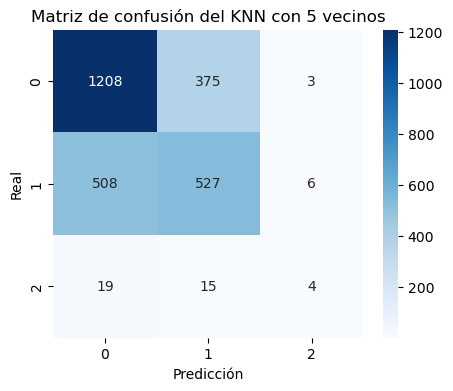

In [1373]:
# Veamos la matriz de confusión en forma de gráfico

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión del KNN con 5 vecinos')
plt.show()

In [1374]:
# Veamos la precisión del modelo

accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted', zero_division=1), recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')

(0.6525328330206379,
 0.6432320204394549,
 0.6525328330206379,
 0.6454549806904225)

### 3.2.1 Optimización del valor de K

Con KNN con K=5 podemos conseguir un score de 0.65, podemos probar con otros valores de K para ver si podemos mejorar el score.

Para ello utilizaremos la función **GridSearchCV** de la librería **scikit-learn**, que nos devuelve el mejor modelo de KNN con el valor de K que le pasemos.

In [1375]:
# RandomSearchCV para encontrar los mejores parámetros para KNN
# K es el número de vecinos, puede ser cualquier número entero positivo que no sea mayor que el número de muestras en el conjunto de entrenamiento

from sklearn.model_selection import GridSearchCV

param_values = {
    'n_neighbors': range(1, 20),
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid=param_values, cv=10, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)}, return_train_score=True,
             scoring='accuracy')

In [1376]:
# Veamos los mejores parámetros

grid_search.best_params_

{'n_neighbors': 13}

In [1377]:
# Veamos la precisión del modelo usando validación cruzada con el conjunto de prueba

from sklearn.model_selection import cross_val_score

best_knn = grid_search.best_estimator_
cross_val_score = cross_val_score(best_knn, X_test, y_test, cv=10, scoring='accuracy')
cross_val_score

array([0.66292135, 0.59925094, 0.68913858, 0.6741573 , 0.59925094,
       0.65037594, 0.63533835, 0.54887218, 0.65789474, 0.62030075])

In [1378]:
# Veamos la precisión media y la desviación típica

print('Precisión media: {:f}'.format(cross_val_score.mean()), '± {:f}'.format(cross_val_score.std()))

Precisión media: 0.633750 ± 0.040223


In [1379]:
# Veamos la matriz de confusión

y_pred = best_knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1264,  322,    0],
       [ 549,  487,    5],
       [  21,   14,    3]], dtype=int64)

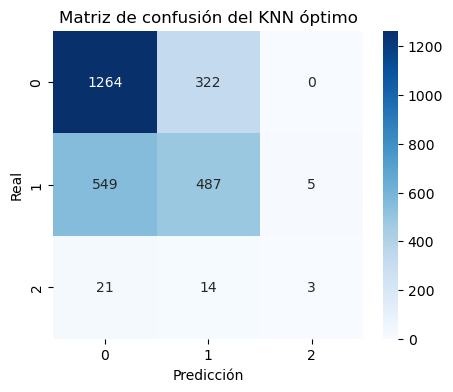

In [1380]:
# Veamos la matriz de confusión en forma de gráfico

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión del KNN óptimo')
plt.show()

In [1381]:
# Veamos la precisión del modelo

accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted', zero_division=1), recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')

(0.6581613508442776,
 0.6466514864253563,
 0.6581613508442776,
 0.6458739402591587)

Aún habiendo optimizado el valor de K, parece ser que no podemos mejorar el score de 0.65, incluso hemos empeorado el score; de momento, parece ser que el modelo de Naive Bayes con distribución Gaussiana es el que mejor se adapta a nuestro problema.

### 3.3. Selección del modelo de Árboles de decisión

A continuación, vamos a evaluar el modelo de árboles de decisión, que es un algoritmo de clasificación supervisada que se basa en la división de los datos en diferentes nodos.

Para ello, vamos a utilizar la función **DecisionTreeClassifier** de la librería **scikit-learn**, que nos devuelve el modelo de árboles de decisión.

In [1382]:
# Entrenamiento del modelo de árbol de decisión

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [1383]:
# Veamos la precisión del modelo usando validación cruzada con el conjunto de prueba

from sklearn.model_selection import cross_val_score

cross_val_score = cross_val_score(tree, X_test, y_test, cv=10, scoring='accuracy')
cross_val_score

array([0.82771536, 0.83146067, 0.85018727, 0.86516854, 0.83895131,
       0.80451128, 0.82706767, 0.84962406, 0.84962406, 0.81203008])

In [1384]:
# Veamos la precisión media y la desviación típica

print('Precisión media: {:f}'.format(cross_val_score.mean()), '± {:f}'.format(cross_val_score.std()))

Precisión media: 0.835634 ± 0.017793


In [1385]:
# Veamos la matriz de confusión

y_pred = tree.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1396,  188,    2],
       [ 168,  847,   26],
       [   4,   21,   13]], dtype=int64)

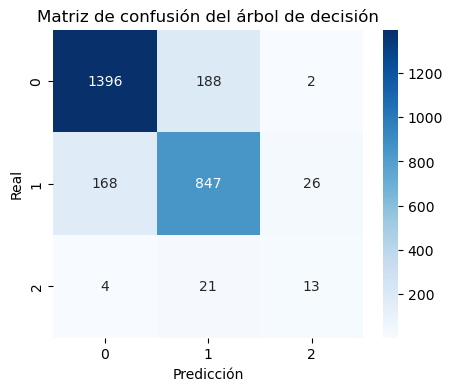

In [1386]:
# Veamos la matriz de confusión en forma de gráfico

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión del árbol de decisión')
plt.show()

In [1387]:
# Veamos la precisión del modelo

accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted', zero_division=1), recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')

(0.8465290806754221,
 0.8476709345935786,
 0.8465290806754221,
 0.8470599249121615)

### 3.3.1 Optimización de los hiperparámetros del modelo de árboles de decisión

Parece que el modelo de árboles de decisión con los parámetros por defecto nos puede dar un score de 0.85, eso ya es bastante mejor que los modelos anteriores, pero vamos a probar a optimizar los parámetros para ver si podemos mejorar el score.

Para ello utilizaremos de nuevo la función **GridSearchCV** de la librería **scikit-learn**, que nos devuelve el mejor modelo de árboles de decisión con los parámetros que le pasemos.

In [1388]:
# GridSearchCV para encontrar los mejores parámetros para el árbol de decisión:
#   - max_depth es la profundidad máxima del árbol, vamos a probar con valores entre 1 y 20
#   - min_samples_split es el número mínimo de muestras requeridas para dividir un nodo interno, vamos a probar con valores entre 2 y 6
#   - max_leaf_nodes es el número máximo de nodos hoja, vamos a probar con valores entre 2 y 50

from sklearn.model_selection import GridSearchCV

param_values = {
    'max_depth': range(1, 21),
    'min_samples_split': range(2, 7), 
    'max_leaf_nodes': range(2, 51),
}

tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tree, param_grid=param_values, cv=10, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 21),
                         'max_leaf_nodes': range(2, 51),
                         'min_samples_split': range(2, 7)},
             return_train_score=True, scoring='accuracy')

In [1389]:
# Veamos los mejores parámetros

grid_search.best_params_

{'max_depth': 9, 'max_leaf_nodes': 41, 'min_samples_split': 2}

In [1390]:
# Veamos la precisión del modelo usando validación cruzada con el conjunto de prueba

from sklearn.model_selection import cross_val_score

best_tree = grid_search.best_estimator_
cross_val_score = cross_val_score(best_tree, X_test, y_test, cv=10, scoring='accuracy')
cross_val_score

array([0.86142322, 0.89138577, 0.90636704, 0.88764045, 0.88014981,
       0.86090226, 0.86842105, 0.90225564, 0.89097744, 0.85714286])

In [1391]:
# Veamos la precisión media y la desviación típica

print('Precisión media: {:f}'.format(cross_val_score.mean()), '± {:f}'.format(cross_val_score.std()))

Precisión media: 0.880667 ± 0.016914


In [1392]:
# Veamos la matriz de confusión

y_pred = best_tree.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1500,   86,    0],
       [ 189,  849,    3],
       [   7,   22,    9]], dtype=int64)

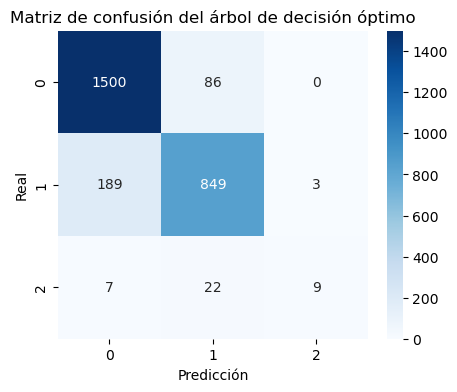

In [1393]:
# Veamos la matriz de confusión en forma de gráfico

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión del árbol de decisión óptimo')
plt.show()

In [1394]:
# Veamos la precisión del modelo

accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted', zero_division=1), recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')

(0.8848030018761726,
 0.8835769757322671,
 0.8848030018761726,
 0.8810879814855379)

# 4. Comparación de los modelos

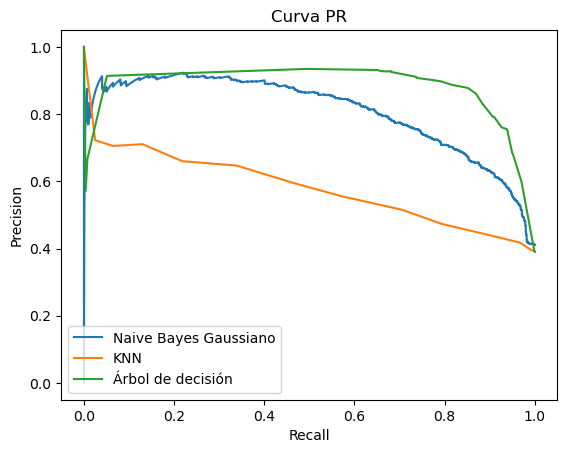

In [1408]:
# Vamos a dibujar la curva PR para cada modelo

from sklearn.metrics import precision_recall_curve

y_pred_proba_nb = nb_gauss.predict_proba(X_test)
precision_nb, recall_nb, thresholds_nb = precision_recall_curve(y_test, y_pred_proba_nb[:, 1], pos_label=1)
plt.plot(recall_nb, precision_nb, label='Naive Bayes Gaussiano')

y_pred_proba_knn = best_knn.predict_proba(X_test)
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, y_pred_proba_knn[:, 1], pos_label=1)
plt.plot(recall_knn, precision_knn, label='KNN')

y_pred_proba_tree = best_tree.predict_proba(X_test)
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_test, y_pred_proba_tree[:, 1], pos_label=1)
plt.plot(recall_tree, precision_tree, label='Árbol de decisión')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva PR')
plt.legend(loc='lower left')
plt.show()

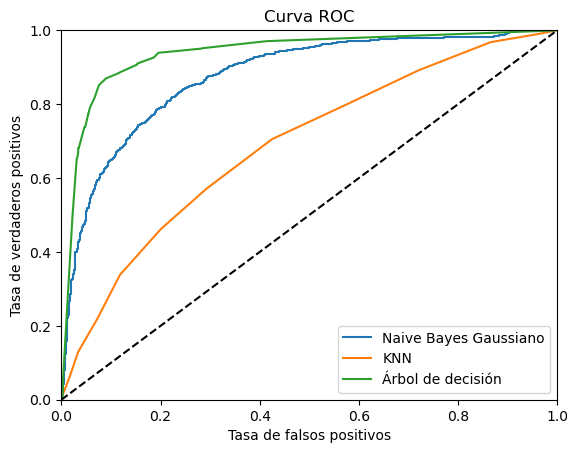

In [1409]:
# Vamos a dibujar la curva ROC para cada modelo

from sklearn.metrics import roc_curve

# Naive Bayes Gaussiano
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_proba_nb[:, 1], pos_label=1)
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes Gaussiano')

# KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn[:, 1], pos_label=1)
plt.plot(fpr_knn, tpr_knn, label='KNN')

# Árbol de decisión
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_proba_tree[:, 1], pos_label=1)
plt.plot(fpr_tree, tpr_tree, label='Árbol de decisión')

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Como se puede ver por la curva ROC, el modelo de árboles de decisión es el que mejor se adapta a nuestro problema, ya que tiene una curva ROC bastante más alta que el resto, además de que tiene un score de 0.88, que es bastante mejor que el resto de modelos. 

Creo que podemos estar bastante satisfechos con estos resultados, para la cantidad de datos que tenemos, veamos la curva de aprendizaje para ver cómo se comportaría el modelo con más datos.

In [1416]:
# Vamos a calcular la curva de aprendizaje para cada modelo

from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Ejemplos de entrenamiento')
    plt.ylabel('Precisión')
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Precisión en el conjunto de entrenamiento')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Precisión en el conjunto de prueba')
    plt.legend(loc='best')
    return plt

<module 'matplotlib.pyplot' from 'd:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

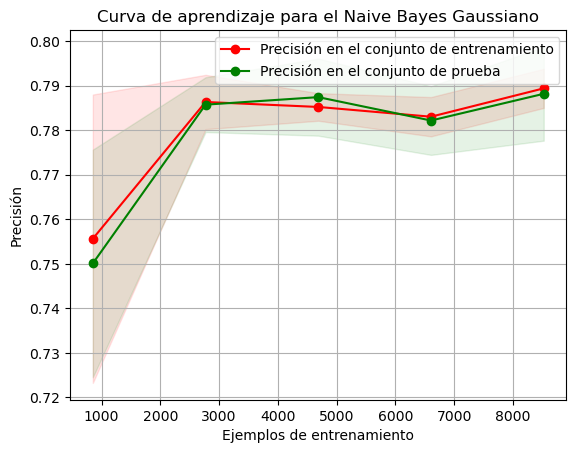

In [1417]:
plot_learning_curve(nb_gauss, 'Curva de aprendizaje para el Naive Bayes Gaussiano', X_train, y_train, cv=5)

El modelo de Naive Bayes con distribución Gaussiana parece bastante prometedor, ya que va generalizando bastante bien y se ajusta muy bien la curva de entrenamiento y la curva de validación, habría que probar con más datos para ver si puede llegar a superar el score del modelo de árboles de decisión.

<module 'matplotlib.pyplot' from 'd:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

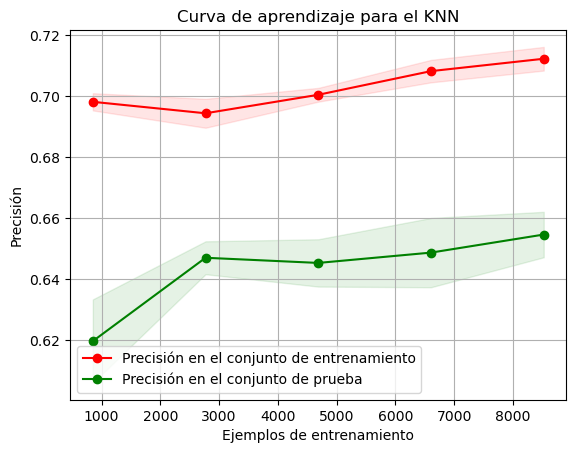

In [1418]:
plot_learning_curve(best_knn, 'Curva de aprendizaje para el KNN', X_train, y_train, cv=5)

KNN parece que no le encaja el problema tan bien; aunque mejora conforme se entrenan más datos, la curva está más baja que la de los otros modelos, por lo que parece que no es el modelo más adecuado para este problema.

<module 'matplotlib.pyplot' from 'd:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

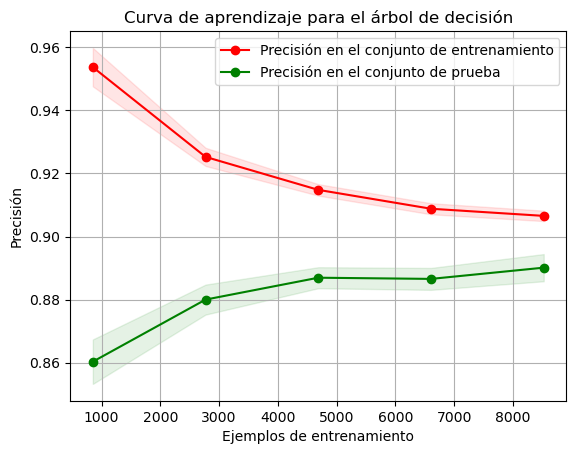

In [1419]:
plot_learning_curve(best_tree, 'Curva de aprendizaje para el árbol de decisión', X_train, y_train, cv=5)

Parece que conforme se entrenan más datos, el árbol de decisión va generalizando mejor, ya que aunque la precisión de los datos de entrenamiento va disminuyendo, la precisión de los datos de validación va aumentando también, por lo que el modelo va generalizando mejor. 

Siendo su curva de aprendizaje bastante buena, además de las puntuaciones que hemos obtenido, podemos concluir que de los modelos probados es el más adecuado para este problema.